<a href="https://colab.research.google.com/github/intimanjunath/Dimensionality_Reduction/blob/main/Dimensionality_Reduction_Breast_Cancer_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#installing packeges
!pip install umap-learn
!pip install plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 2.9 MB/s eta 0:00:00


In [2]:
#Load and Preprocess the Dataset
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load Breast Cancer dataset
data = load_breast_cancer()
X = data.data  # Features
y = data.target  # Target labels

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Display dataset information
df = pd.DataFrame(X, columns=data.feature_names)
print(f"Dataset Shape: {df.shape}")
df.head()

Dataset Shape: (569, 30)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


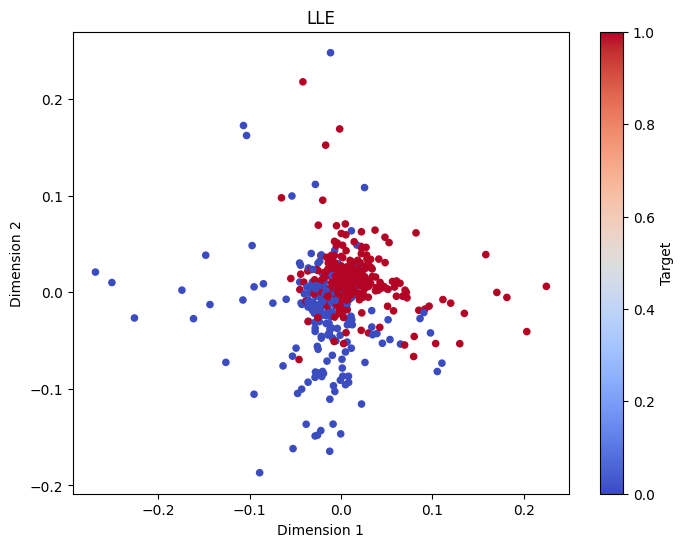

In [3]:
#Locally Linear Embedding (LLE)
from sklearn.manifold import LocallyLinearEmbedding
import matplotlib.pyplot as plt

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
X_lle = lle.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_lle[:, 0], X_lle[:, 1], c=y, cmap='coolwarm', s=20)
plt.colorbar(label='Target')
plt.title("LLE")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

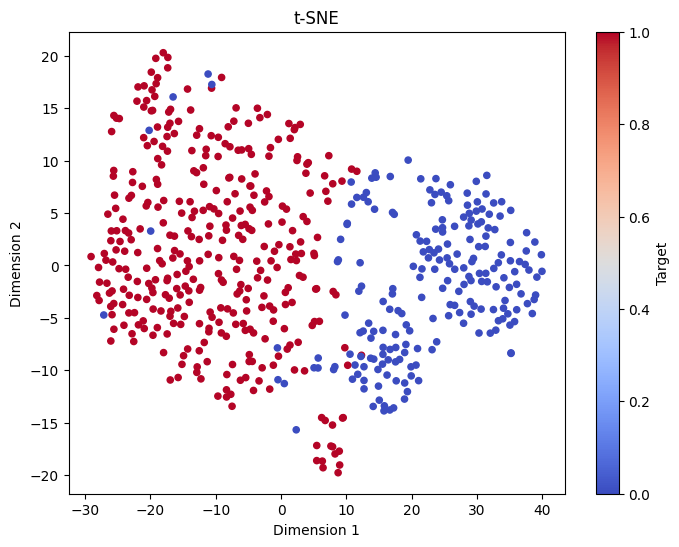

In [4]:
#t-SNE (Interactive Visualization)
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='coolwarm', s=20)
plt.colorbar(label='Target')
plt.title("t-SNE")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

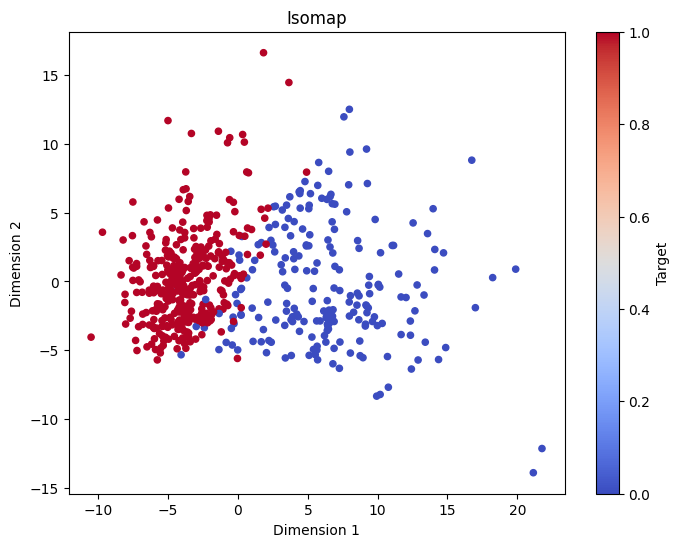

In [5]:
#isomap
from sklearn.manifold import Isomap

isomap = Isomap(n_components=2, n_neighbors=10)
X_isomap = isomap.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_isomap[:, 0], X_isomap[:, 1], c=y, cmap='coolwarm', s=20)
plt.colorbar(label='Target')
plt.title("Isomap")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


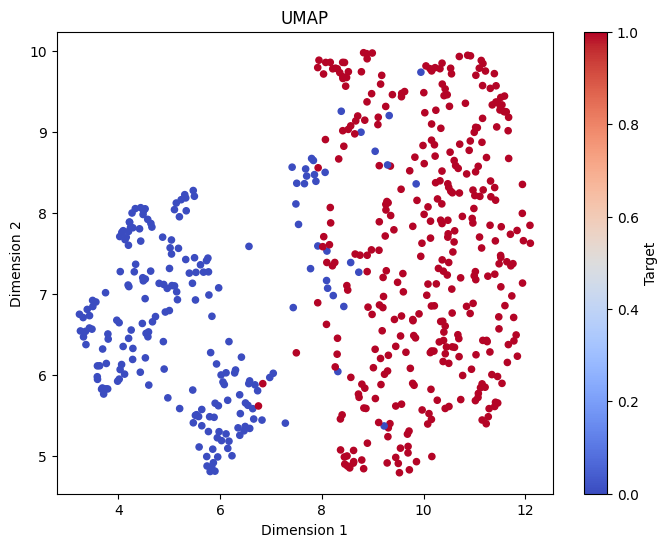

In [6]:
#UMAP (Interactive Visualization)
import umap

umap_reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
X_umap = umap_reducer.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='coolwarm', s=20)
plt.colorbar(label='Target')
plt.title("UMAP")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

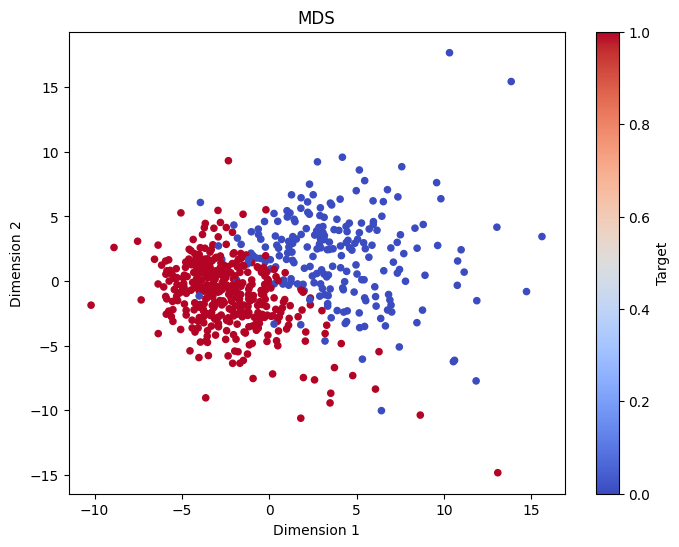

In [7]:
#Multidimensional Scaling (MDS)
from sklearn.manifold import MDS

mds = MDS(n_components=2, random_state=42)
X_mds = mds.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_mds[:, 0], X_mds[:, 1], c=y, cmap='coolwarm', s=20)
plt.colorbar(label='Target')
plt.title("MDS")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

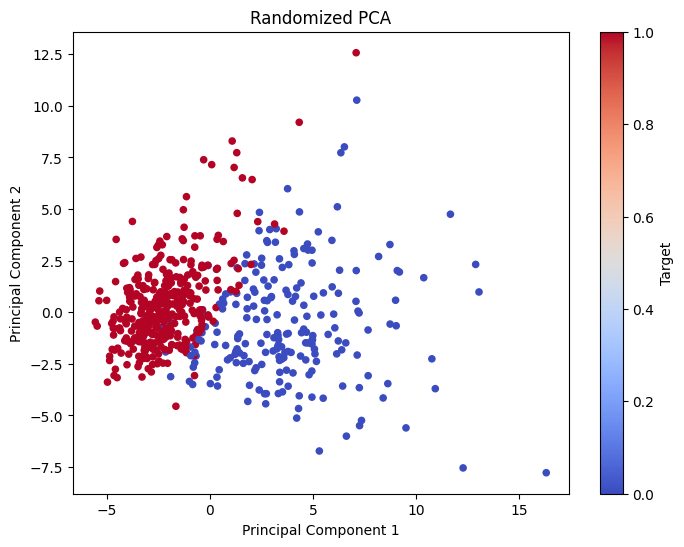

In [8]:
#Randomized PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', s=20)
plt.colorbar(label='Target')
plt.title("Randomized PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

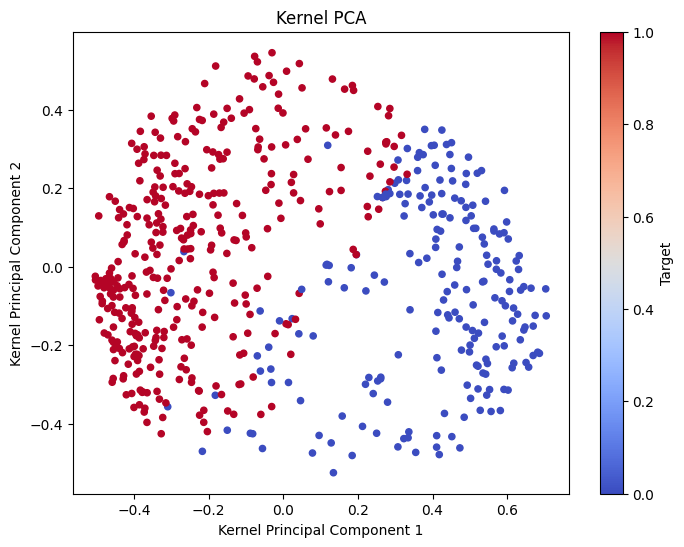

In [9]:
#Kernel PCA
from sklearn.decomposition import KernelPCA

kernel_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.03)
X_kernel_pca = kernel_pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_kernel_pca[:, 0], X_kernel_pca[:, 1], c=y, cmap='coolwarm', s=20)
plt.colorbar(label='Target')
plt.title("Kernel PCA")
plt.xlabel("Kernel Principal Component 1")
plt.ylabel("Kernel Principal Component 2")
plt.show()

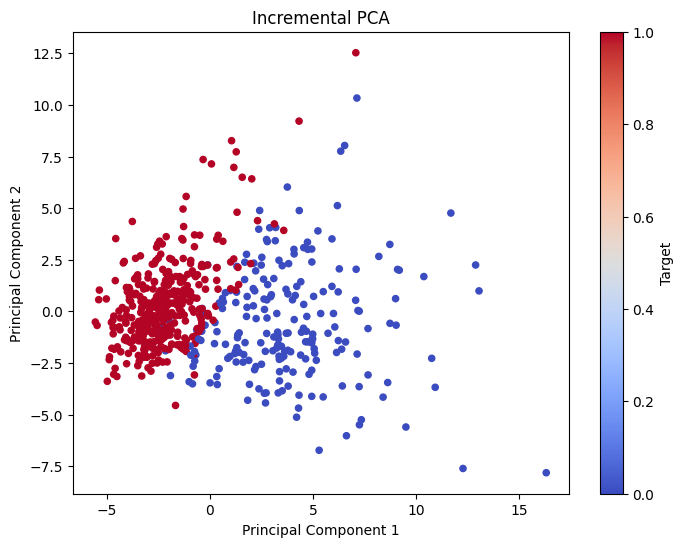

In [10]:
#Incremental PCA
from sklearn.decomposition import IncrementalPCA

incremental_pca = IncrementalPCA(n_components=2)
X_incremental_pca = incremental_pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_incremental_pca[:, 0], X_incremental_pca[:, 1], c=y, cmap='coolwarm', s=20)
plt.colorbar(label='Target')
plt.title("Incremental PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

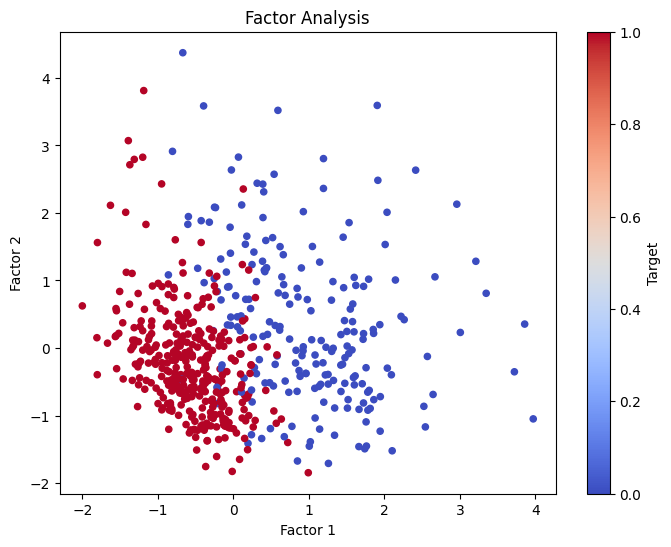

In [16]:
#Factor Analysis
from sklearn.decomposition import FactorAnalysis

fa = FactorAnalysis(n_components=2, random_state=42)
X_fa = fa.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_fa[:, 0], X_fa[:, 1], c=y, cmap='coolwarm', s=20)
plt.colorbar(label='Target')
plt.title("Factor Analysis")
plt.xlabel("Factor 1")
plt.ylabel("Factor 2")
plt.show()

In [11]:
#Autoencoders
from keras.models import Model
from keras.layers import Input, Dense

# Define Autoencoder
input_dim = X_scaled.shape[1]
encoding_dim = 2  # Latent space dimension

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

In [12]:
# Compile Autoencoder
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [13]:
# Train Autoencoder
autoencoder.fit(X_scaled, X_scaled, epochs=50, batch_size=16, shuffle=True, verbose=1)

Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.1895   
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2298
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1399 
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0995
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0873 
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0643 
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0320
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9783
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9418
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8841
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8417
Epoch 12/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8648
Epoch 13/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8205
Epoch 14/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7936
Epoch 15/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8112
Epoch 16/50
3

In [14]:
# Extract Encoded Data
encoder = Model(input_layer, encoded)
X_autoencoded = encoder.predict(X_scaled)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


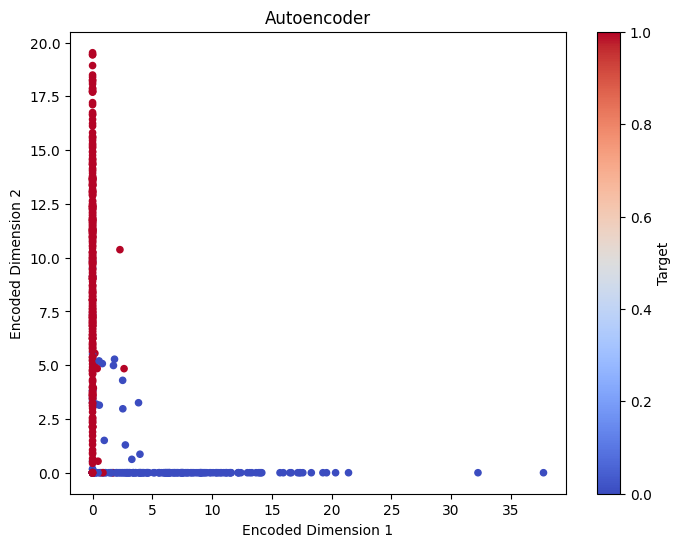

In [15]:
# Visualize Autoencoder results
plt.figure(figsize=(8, 6))
plt.scatter(X_autoencoded[:, 0], X_autoencoded[:, 1], c=y, cmap='coolwarm', s=20)
plt.colorbar(label='Target')
plt.title("Autoencoder")
plt.xlabel("Encoded Dimension 1")
plt.ylabel("Encoded Dimension 2")
plt.show()